In [19]:
from ISLP import load_data
import pandas as pd

## Getting Data

In [31]:
data = load_data('BrainCancer')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sex        88 non-null     category
 1   diagnosis  87 non-null     category
 2   loc        88 non-null     category
 3   ki         88 non-null     int64   
 4   gtv        88 non-null     float64 
 5   stereo     88 non-null     category
 6   status     88 non-null     int64   
 7   time       88 non-null     float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 3.8 KB


## Getting Dummies and Target

In [32]:
event = data['status'].astype(bool)
time_exit = data['time']
dummies = pd.get_dummies(data.drop(['status', 'time'], axis=1))

dummies

,ki,gtv,sex_Female,sex_Male,diagnosis_HG glioma,diagnosis_LG glioma,diagnosis_Meningioma,diagnosis_Other,loc_Infratentorial,loc_Supratentorial,stereo_SRS,stereo_SRT
0,90,6.11,True,False,False,False,True,False,True,False,True,False
1,90,19.35,False,True,True,False,False,False,False,True,False,True
2,70,7.95,True,False,False,False,True,False,True,False,True,False
3,80,7.61,True,False,False,True,False,False,False,True,False,True
4,90,5.06,False,True,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
83,80,0.16,False,True,True,False,False,False,False,True,False,True
84,80,19.81,False,True,True,False,False,False,False,True,False,True
85,90,2.50,False,True,False,False,True,False,False,True,False,True
86,90,2.02,False,True,False,False,True,False,False,True,True,False


# Kaplan-Meier Curve

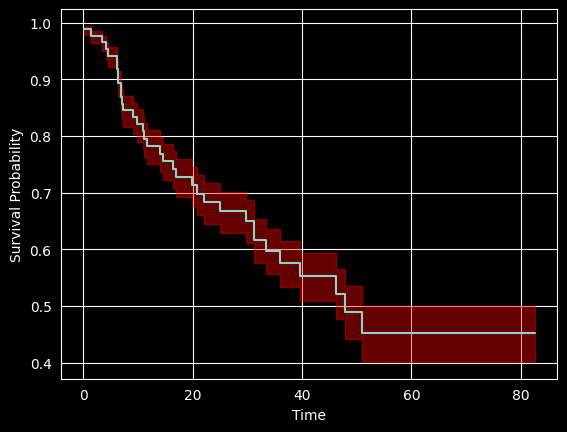

In [40]:
from sksurv.nonparametric import kaplan_meier_estimator
import matplotlib.pyplot as plt

time, prob_surv, conf_int = kaplan_meier_estimator(
    event, time_exit, conf_type='log-log',  conf_level=0.5
)

plt.step(time, prob_surv, where="post")
plt.fill_between(time, conf_int[0], conf_int[1], step="post", alpha=0.4, color="red")
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()